In [21]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [22]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [23]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [24]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [25]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

bredasdorp za
dwarka in
hobart au
tsihombe mg
punta arenas cl
tocopilla cl
busselton au
hilo us
punta arenas cl
saskylakh ru
mahebourg mu
mahebourg mu
palabuhanratu id
harper lr
illoqqortoormiut gl
marcona pe
ushuaia ar
lebu cl
balkanabat tm
mahaicony gy
saskylakh ru
puerto ayora ec
avarua ck
albany au
phan rang vn
nikolskoye ru
butaritari ki
puerto ayora ec
dikson ru
kuching my
hithadhoo mv
sitka us
cape town za
tuktoyaktuk ca
ginir et
albany au
vaini to
khandyga ru
orange cove us
thompson ca
bubaque gw
albany au
coihaique cl
lavrentiya ru
butaritari ki
bambous virieux mu
hobart au
new norfolk au
bluff nz
belushya guba ru
arraial do cabo br
yulara au
tirat karmel il
albany au
albany au
phalaborwa za
vaini to
new norfolk au
kenai us
mahebourg mu
souillac mu
saskylakh ru
esperance au
kapaa us
taolanaro mg
hithadhoo mv
iqaluit ca
georgetown sh
roald no
lebu cl
georgetown sh
port elizabeth za
east london za
arraial do cabo br
bredasdorp za
pacific grove us
asau tv
saint-philippe re
ushuai

ushuaia ar
coihaique cl
mahebourg mu
himora et
ariquemes br
ushuaia ar
nanchang cn
kavieng pg
saint-lo fr
zhuhai cn
hobart au
murray bridge au
chervishevo ru
albany au
punta arenas cl
yendi gh
kavieng pg
dikson ru
ribeira grande pt
nikolskoye ru
hobart au
belmonte br
whitehorse ca
ribeira grande pt
vaini to
talnakh ru
jamestown sh
jamestown sh
saint-augustin ca
saint george bm
salalah om
albany au
chokurdakh ru
tasiilaq gl
port elizabeth za
albany au
ponta do sol cv
avarua ck
ust-kuyga ru
the valley ai
los llanos de aridane es
dalvik is
goya ar
bredasdorp za
yellowknife ca
mount gambier au
bredasdorp za
jamestown sh
nanakuli us
tiksi ru
rikitea pf
puerto colombia co
broken hill au
ushuaia ar
sao felix do xingu br
saint-pierre mq
avarua ck
basco ph
kapaa us
kamenskoye ru
dunedin nz
barentsburg sj
hobart au
castro cl
ostersund se
jamestown sh
amderma ru
upernavik gl
atuona pf
geraldton au
progreso mx
cherskiy ru
rikitea pf
manzanillo mx
hobart au
wonthaggi au
mataura pf
mariental na
kamy

mataura pf
nanortalik gl
bluff nz
hermanus za
ambon id
georgetown sh
isangel vu
chokurdakh ru
avarua ck
mys shmidta ru
atuona pf
tuatapere nz
hobart au
quibdo co
lucea jm
pemberton ca
sayyan ye
rikitea pf
port alfred za
hermanus za
severnyy-kospashskiy ru
rikitea pf
new norfolk au
nanortalik gl
meyungs pw
neiafu to
bredasdorp za
lazaro cardenas mx
port lincoln au
ribeira grande pt
tsihombe mg
barranca pe
ulaangom mn
prattville us
krasnyye tkachi ru
khandyga ru
najran sa
sao joao da barra br
punta arenas cl
port hardy ca
manaus br
champerico gt
busselton au
mataura pf
tura ru
saint-augustin ca
vaini to
new norfolk au
labutta mm
shimoda jp
yellowknife ca
mataura pf
narsaq gl
cape town za
tuktoyaktuk ca
bengkulu id
carnarvon au


In [26]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [35]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | dwarka
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | tocopilla
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 12 of Set 1 | harper
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | marcona
City not found. Skipping...
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | balkanabat
Processing Record 18 of Set 1 | mahaicony
City not found. Skipping...
Processing Record 19 of Set 1 | puerto ayora
Processing Recor

Processing Record 35 of Set 4 | am timan
Processing Record 36 of Set 4 | torbay
Processing Record 37 of Set 4 | copiapo
Processing Record 38 of Set 4 | robertsport
Processing Record 39 of Set 4 | mount pleasant
Processing Record 40 of Set 4 | murgab
Processing Record 41 of Set 4 | saldanha
Processing Record 42 of Set 4 | baherden
Processing Record 43 of Set 4 | geraldton
Processing Record 44 of Set 4 | houston
Processing Record 45 of Set 4 | caravelas
Processing Record 46 of Set 4 | burica
City not found. Skipping...
Processing Record 47 of Set 4 | kaduqli
Processing Record 48 of Set 4 | foindu
Processing Record 49 of Set 4 | tanabe
Processing Record 50 of Set 4 | yellowknife
Processing Record 1 of Set 5 | mopipi
Processing Record 2 of Set 5 | bairnsdale
Processing Record 3 of Set 5 | bonavista
Processing Record 4 of Set 5 | pangnirtung
Processing Record 5 of Set 5 | berlevag
Processing Record 6 of Set 5 | biltine
Processing Record 7 of Set 5 | namibe
Processing Record 8 of Set 5 | uri

Processing Record 23 of Set 8 | belmonte
Processing Record 24 of Set 8 | whitehorse
Processing Record 25 of Set 8 | saint-augustin
Processing Record 26 of Set 8 | ponta do sol
Processing Record 27 of Set 8 | ust-kuyga
Processing Record 28 of Set 8 | the valley
Processing Record 29 of Set 8 | los llanos de aridane
Processing Record 30 of Set 8 | dalvik
Processing Record 31 of Set 8 | goya
Processing Record 32 of Set 8 | nanakuli
Processing Record 33 of Set 8 | puerto colombia
Processing Record 34 of Set 8 | broken hill
Processing Record 35 of Set 8 | sao felix do xingu
Processing Record 36 of Set 8 | saint-pierre
Processing Record 37 of Set 8 | basco
Processing Record 38 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 39 of Set 8 | dunedin
Processing Record 40 of Set 8 | ostersund
Processing Record 41 of Set 8 | manzanillo
Processing Record 42 of Set 8 | wonthaggi
Processing Record 43 of Set 8 | mariental
Processing Record 44 of Set 8 | kamyaran
Processing Record 45 

Processing Record 9 of Set 12 | port macquarie
Processing Record 10 of Set 12 | duldurga
Processing Record 11 of Set 12 | kuva
City not found. Skipping...
Processing Record 12 of Set 12 | odweyne
Processing Record 13 of Set 12 | trinidad
Processing Record 14 of Set 12 | gallup
Processing Record 15 of Set 12 | sao joao da barra
Processing Record 16 of Set 12 | chara
Processing Record 17 of Set 12 | russell
Processing Record 18 of Set 12 | la palma
Processing Record 19 of Set 12 | labuhan
Processing Record 20 of Set 12 | hakui
Processing Record 21 of Set 12 | rawson
Processing Record 22 of Set 12 | tezu
Processing Record 23 of Set 12 | pemangkat
Processing Record 24 of Set 12 | kargasok
Processing Record 25 of Set 12 | sira
Processing Record 26 of Set 12 | kalya
Processing Record 27 of Set 12 | songjianghe
Processing Record 28 of Set 12 | beaverlodge
Processing Record 29 of Set 12 | estelle
Processing Record 30 of Set 12 | chumphon
Processing Record 31 of Set 12 | tura
Processing Record 

In [36]:
len(city_data)

561

In [37]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,66.20,72,81,6.93,ZA,2021-01-07 01:55:23
1,Dwarka,22.2394,68.9678,65.79,55,1,14.70,IN,2021-01-07 01:55:23
2,Hobart,-42.8794,147.3294,73.00,51,20,12.75,AU,2021-01-07 01:55:23
3,Punta Arenas,-53.1500,-70.9167,50.00,87,81,8.05,CL,2021-01-07 01:52:09
4,Tocopilla,-22.0920,-70.1979,68.76,64,0,2.86,CL,2021-01-07 01:55:24
5,Busselton,-33.6500,115.3333,89.01,32,99,1.99,AU,2021-01-07 01:55:24
6,Hilo,19.7297,-155.0900,80.60,61,75,3.36,US,2021-01-07 01:53:26
7,Saskylakh,71.9167,114.0833,9.46,92,100,27.65,RU,2021-01-07 01:55:24
8,Mahebourg,-20.4081,57.7000,71.60,88,40,3.36,MU,2021-01-07 01:55:25
9,Harper,4.3750,-7.7169,78.51,85,96,8.86,LR,2021-01-07 01:55:25


In [39]:
# Reorder columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
reordered_city_data_df = city_data_df[new_column_order]
reordered_city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-01-07 01:55:23,-34.5322,20.0403,66.20,72,81,6.93
1,Dwarka,IN,2021-01-07 01:55:23,22.2394,68.9678,65.79,55,1,14.70
2,Hobart,AU,2021-01-07 01:55:23,-42.8794,147.3294,73.00,51,20,12.75
3,Punta Arenas,CL,2021-01-07 01:52:09,-53.1500,-70.9167,50.00,87,81,8.05
4,Tocopilla,CL,2021-01-07 01:55:24,-22.0920,-70.1979,68.76,64,0,2.86
...,...,...,...,...,...,...,...,...,...
556,Prattville,US,2021-01-07 01:57:41,32.4640,-86.4597,44.60,75,1,4.85
557,Krasnyye Tkachi,RU,2021-01-07 01:57:41,57.4926,39.7563,23.00,92,90,2.55
558,Najran,SA,2021-01-07 01:57:42,17.4924,44.1277,51.80,57,0,1.88
559,Manaus,BR,2021-01-07 01:53:55,-3.1019,-60.0250,82.40,94,75,5.82


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

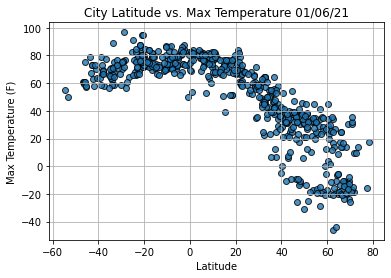

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

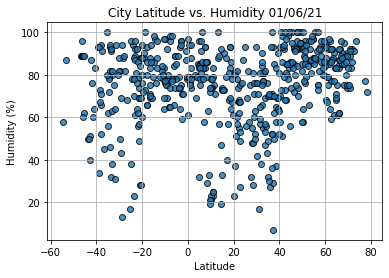

In [44]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

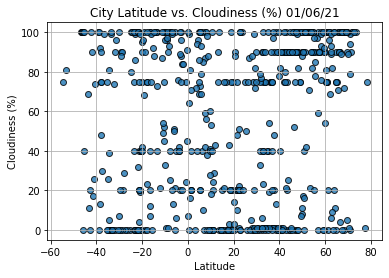

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

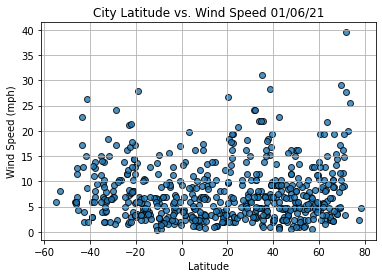

In [46]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()